In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset.csv')

In [4]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [5]:
df.isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [7]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [8]:
df.isna().sum().sum()

5743492

In [9]:
df.isna().sum().iloc[:56]

encounter_id                     0
patient_id                       0
hospital_id                      0
hospital_death                   0
age                           4228
bmi                           3429
elective_surgery                 0
ethnicity                     1395
gender                          25
height                        1334
hospital_admit_source        21409
icu_admit_source               112
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
readmission_status               0
weight                        2720
albumin_apache               54379
apache_2_diagnosis            1662
apache_3j_diagnosis           1101
apache_post_operative            0
arf_apache                     715
bilirubin_apache             58134
bun_apache                   19262
creatinine_apache            18853
fio2_apache                  70868
gcs_eyes_apache               1901
gcs_motor_apache    

In [10]:
df.isnull().sum()/df.shape[0] 

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
hospital_death                 0.000000
age                            0.046100
                                 ...   
leukemia                       0.007796
lymphoma                       0.007796
solid_tumor_with_metastasis    0.007796
apache_3j_bodysystem           0.018122
apache_2_bodysystem            0.018122
Length: 186, dtype: float64

In [11]:
 df.columns[df.isnull().sum()/df.shape[0]  < 0.8]

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=152)

In [12]:
len( df.columns[df.isnull().sum()/df.shape[0]  < 0.4])

112

In [13]:
len(df.columns)

186

In [15]:
 df1 = df[df.columns[df.isnull().sum()/df.shape[0]  < 0.5]]

In [16]:
df1

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [17]:
df1.drop(columns=['encounter_id','patient_id','hospital_id'],inplace=True)

In [18]:
df1

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,927,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Emergency Department,Floor,925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,908,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Emergency Department,Accident & Emergency,922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [19]:
df1.isnull().sum().iloc[:60]

hospital_death                   0
age                           4228
bmi                           3429
elective_surgery                 0
ethnicity                     1395
gender                          25
height                        1334
hospital_admit_source        21409
icu_admit_source               112
icu_id                           0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
readmission_status               0
weight                        2720
apache_2_diagnosis            1662
apache_3j_diagnosis           1101
apache_post_operative            0
arf_apache                     715
bun_apache                   19262
creatinine_apache            18853
gcs_eyes_apache               1901
gcs_motor_apache              1901
gcs_unable_apache             1037
gcs_verbal_apache             1901
glucose_apache               11036
heart_rate_apache              878
hematocrit_apache            19878
intubated_apache    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [21]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [22]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [23]:
df.drop(columns=['encounter_id','patient_id','hospital_id'],inplace=True)

In [24]:
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,927,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Emergency Department,Floor,925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,908,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Emergency Department,Accident & Emergency,922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [25]:
df['ethnicity'].unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

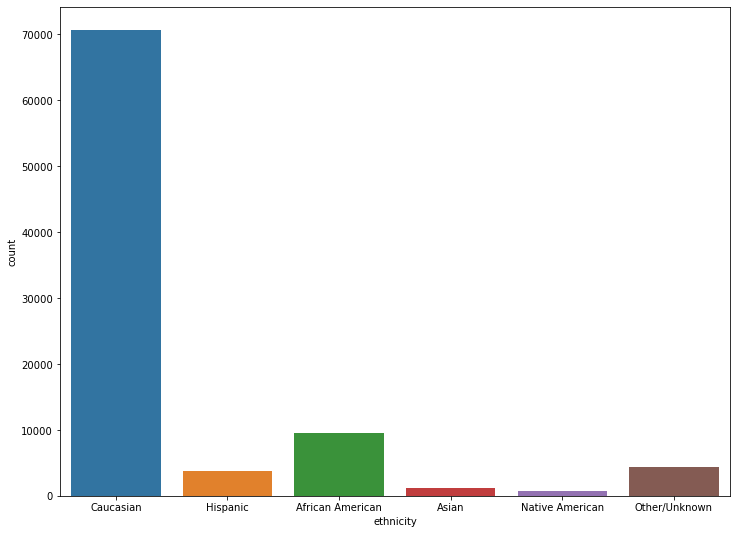

In [26]:
plt.figure(figsize=(12,9))
sns.countplot(df['ethnicity'])
plt.show()

In [27]:
df['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [28]:
MD=df['ethnicity'].mode()
df['ethnicity'].fillna(value=MD,inplace=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

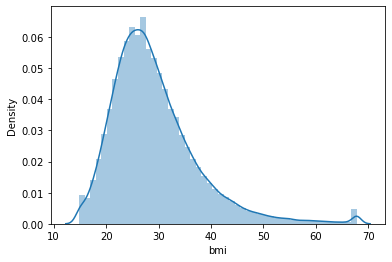

In [29]:
sns.distplot(df['bmi'])

In [30]:
df.fillna(df.mean(),inplace=True)

In [31]:
df.isnull().sum().sum()

26265

In [32]:
df['hospital_admit_source'].dtypes

dtype('O')

In [33]:
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.000000,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.000000,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.000000,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.000000,29.185818,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,Caucasian,M,177.8,Acute Care/Floor,Floor,927,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.000000,47.179671,0,Caucasian,F,183.0,Emergency Department,Floor,925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.000000,27.236914,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,908,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,62.309516,23.297481,0,Caucasian,F,154.9,Emergency Department,Accident & Emergency,922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [34]:
df.columns

Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'hospital_admit_source', 'icu_admit_source',
       'icu_id',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=183)

In [35]:
df.isnull().sum().sum()

26265

In [36]:
catCols = [col for col in df.columns if df[col].dtype=="O"]

In [37]:
catCols 

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [38]:
df.isnull().sum().sum()

26265

In [39]:
df['ethnicity'].isnull().sum()

1395

In [40]:
df['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [41]:
df['ethnicity'].fillna(df['ethnicity'].value_counts().index[0],inplace=True)

In [42]:
df['ethnicity'].isnull().sum()

0

In [43]:
df['gender'].isnull().sum()

25

In [44]:
df['gender'].value_counts()

M    49469
F    42219
Name: gender, dtype: int64

In [45]:
df['gender'].fillna(df['gender'].value_counts().index[0],inplace=True)

In [46]:
df['gender'].isnull().sum()

0

In [47]:
df['hospital_admit_source'].isnull().sum()

21409

In [48]:
df['hospital_admit_source'].value_counts()

Emergency Department    36962
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

In [49]:
df['hospital_admit_source'].fillna(df['hospital_admit_source'].value_counts().index[0],inplace=True)

In [50]:
df['hospital_admit_source'].isnull().sum()

0

In [51]:
df['icu_admit_source'].isnull().sum()

112

In [52]:
df['icu_admit_source'].value_counts()

Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15611
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64

In [53]:
df['icu_admit_source'].fillna(df['icu_admit_source'].value_counts().index[0],inplace=True)

In [54]:
df['icu_admit_source'].isnull().sum()

0

In [55]:
catCols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [56]:
df['icu_stay_type'].fillna(df['icu_stay_type'].value_counts().index[0],inplace=True)
df['icu_type'].fillna(df['icu_type'].value_counts().index[0],inplace=True)
df['apache_3j_bodysystem'].fillna(df['apache_3j_bodysystem'].value_counts().index[0],inplace=True)
df['apache_2_bodysystem'].fillna(df['apache_2_bodysystem'].value_counts().index[0],inplace=True)

In [57]:
df.isnull().sum().sum()

0

## Analysis Categorical Columns

In [58]:
catCols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

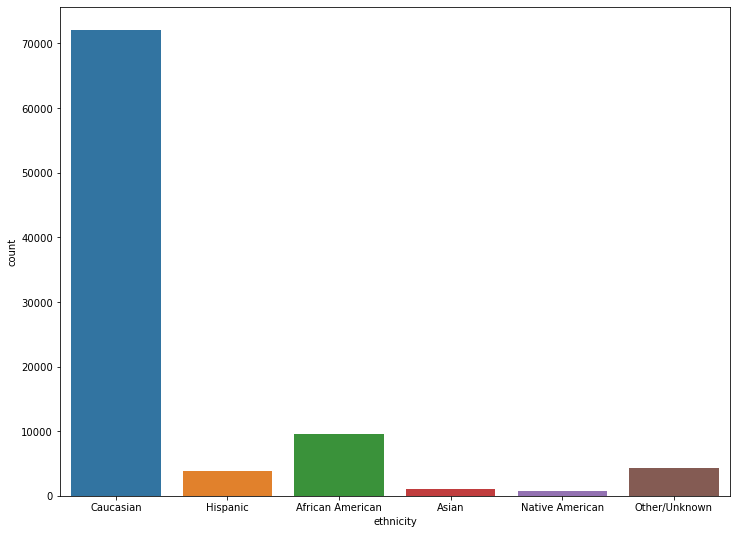

In [59]:
plt.figure(figsize=(12,9))
sns.countplot(df['ethnicity'])
plt.show()

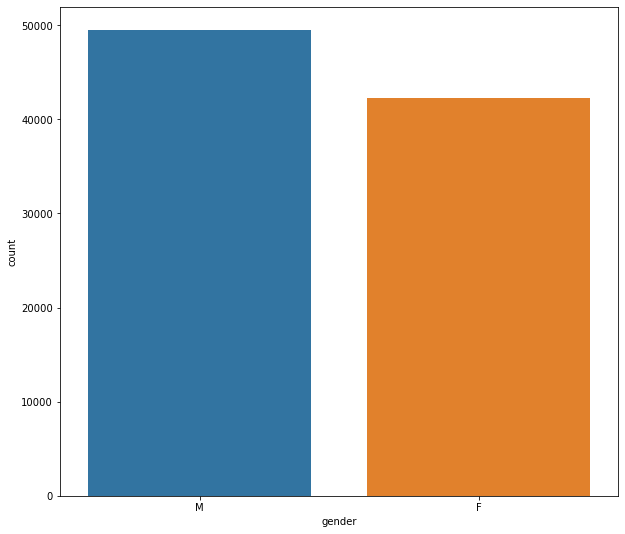

In [60]:
plt.figure(figsize=(10,9))
sns.countplot(df['gender'])
plt.show()

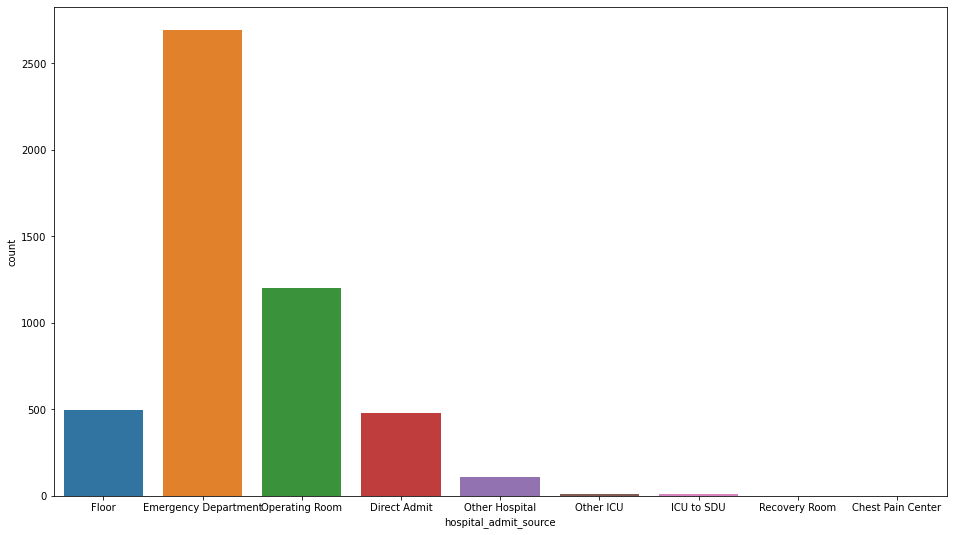

In [61]:
plt.figure(figsize=(16,9))
sns.countplot(df['hospital_admit_source'].iloc[:5000])
plt.show()

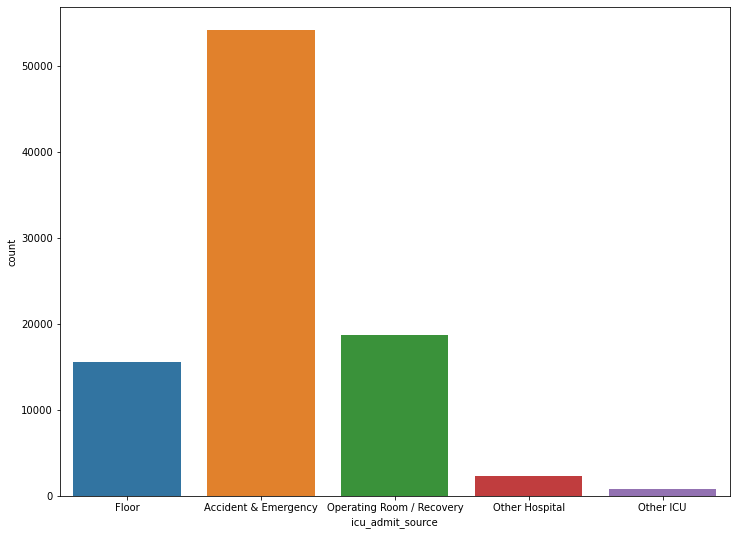

In [62]:
plt.figure(figsize=(12,9))
sns.countplot(df['icu_admit_source'])
plt.show()

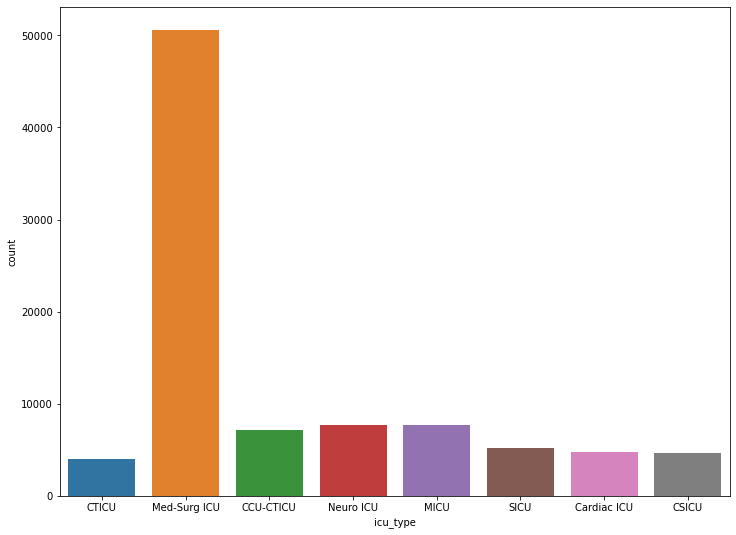

In [63]:
plt.figure(figsize=(12,9))
sns.countplot(df['icu_type'])
plt.show()

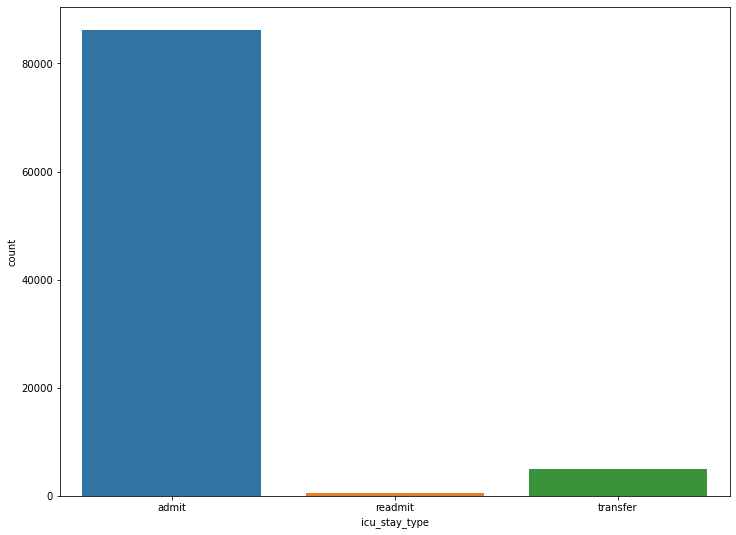

In [64]:
plt.figure(figsize=(12,9))
sns.countplot(df['icu_stay_type'])
plt.show()

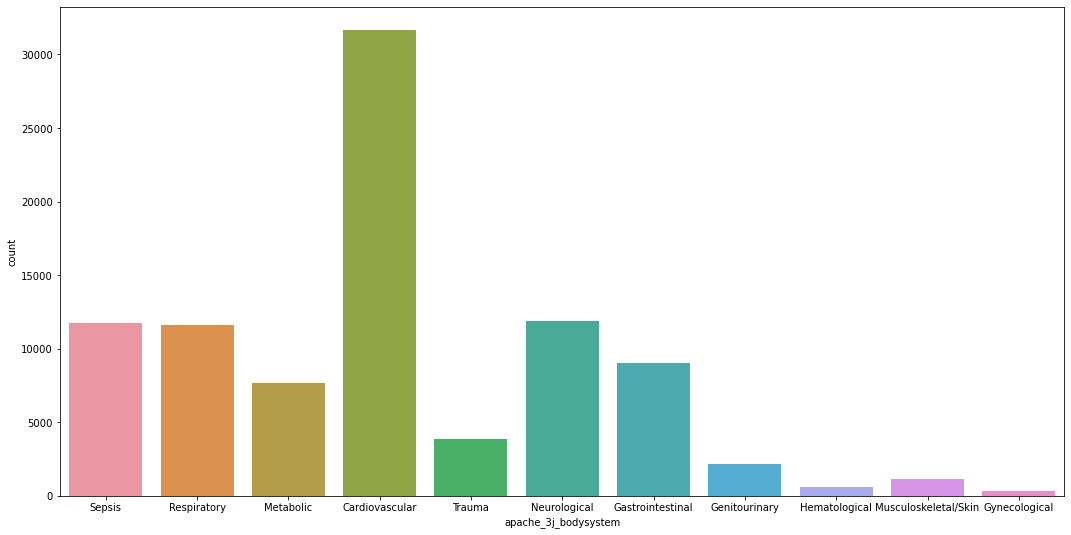

In [65]:
plt.figure(figsize=(18,9))
sns.countplot(df['apache_3j_bodysystem'])
plt.show()

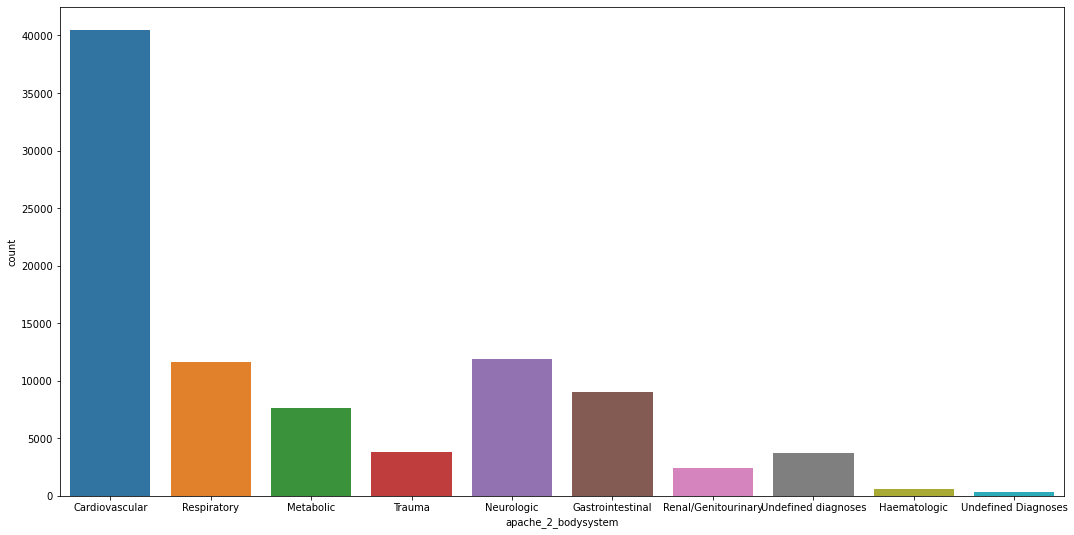

In [66]:
plt.figure(figsize=(18,9))
sns.countplot(df['apache_2_bodysystem'])
plt.show()

In [67]:
catCols

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [68]:
df['ethnicity'].unique()

array(['Caucasian', 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
lr = LabelEncoder()

In [71]:
df['ethnicity'] = lr.fit_transform(df['ethnicity'])
df['gender'] = lr.fit_transform(df['gender'])
df['hospital_admit_source'] = lr.fit_transform(df['hospital_admit_source'])
df['icu_admit_source'] = lr.fit_transform(df['icu_admit_source'])
df['icu_stay_type'] = lr.fit_transform(df['icu_stay_type'])
df['icu_type'] = lr.fit_transform(df['icu_type'])
df['apache_3j_bodysystem'] = lr.fit_transform(df['apache_3j_bodysystem'])
df['apache_2_bodysystem'] = lr.fit_transform(df['apache_2_bodysystem'])

In [72]:
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,2,1,180.3,4,1,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,0,77.000000,27.420000,0,2,0,160.0,4,1,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,0,25.000000,31.950000,0,2,0,172.7,3,0,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,0,81.000000,22.640000,1,2,0,165.1,8,2,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,19.000000,29.185818,0,2,1,188.0,3,0,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,2,1,177.8,0,1,927,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,0,56.000000,47.179671,0,2,0,183.0,3,1,925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,0,48.000000,27.236914,0,2,1,170.2,3,0,908,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,0,62.309516,23.297481,0,2,0,154.9,3,0,922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [73]:
df.isnull().sum().sum()

0

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier

In [75]:
X = df.drop(columns=['hospital_death'],axis=1)
y = df['hospital_death']

In [76]:
X

,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.000000,22.730000,0,2,1,180.3,4,1,92,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,77.000000,27.420000,0,2,0,160.0,4,1,90,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,25.000000,31.950000,0,2,0,172.7,3,0,93,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,81.000000,22.640000,1,2,0,165.1,8,2,92,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,19.000000,29.185818,0,2,1,188.0,3,0,91,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,2,1,177.8,0,1,927,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,56.000000,47.179671,0,2,0,183.0,3,1,925,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,48.000000,27.236914,0,2,1,170.2,3,0,908,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,62.309516,23.297481,0,2,0,154.9,3,0,922,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [77]:
y

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
X_scale = scaler.fit_transform(X)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=45)

## 1. Logistic Regression

In [82]:
model1 = LogisticRegression()

In [83]:
model1.fit(x_train,y_train)

LogisticRegression()

In [84]:
model1.score(x_train,y_train)

0.927740307481425

In [85]:
model1.score(x_test,y_test)

0.925492476557389

In [86]:
y_pred = model1.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.927740307481425
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     58641
           1       0.69      0.30      0.42      5558

    accuracy                           0.93     64199
   macro avg       0.81      0.64      0.69     64199
weighted avg       0.92      0.93      0.91     64199



## 2. Decission Tree

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.2,random_state=45)

In [88]:
model2 = DecisionTreeClassifier()

In [89]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
model2.score(x_train,y_train)

1.0

In [91]:
model2.score(x_test,y_test)

0.8819713242108707

In [92]:
y_pred = model2.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67004
           1       1.00      1.00      1.00      6366

    accuracy                           1.00     73370
   macro avg       1.00      1.00      1.00     73370
weighted avg       1.00      1.00      1.00     73370



## 3. Random Forest

In [96]:
from sklearn.metrics import r2_score

In [103]:
model3 = RandomForestClassifier()

In [104]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [105]:
model3.score(x_train,y_train)

1.0

In [106]:
model3.score(x_test,y_test)

0.9286376274328082

In [107]:
y_pred = model3.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67048
           1       1.00      1.00      1.00      6322

    accuracy                           1.00     73370
   macro avg       1.00      1.00      1.00     73370
weighted avg       1.00      1.00      1.00     73370



## 4. SVM

In [159]:
model3 = SVC()

In [160]:
model3.fit(x_train,y_train)

SVC()

In [161]:
model3.score(x_train,y_train)

0.9520103584571351

In [162]:
model3.score(x_test,y_test)

0.9270021261516654

In [163]:
y_pred = model3.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.9520103584571351
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     67004
           1       0.98      0.46      0.62      6366

    accuracy                           0.95     73370
   macro avg       0.96      0.73      0.80     73370
weighted avg       0.95      0.95      0.94     73370



## 5. SGDClassifier

In [165]:
model4 = SGDClassifier()

In [166]:
model4.fit(x_train,y_train)

SGDClassifier()

In [167]:
model4.score(x_train,y_train)

0.9237563036663486

In [168]:
model4.score(x_test,y_test)

0.924221773973723

In [169]:
y_pred = model4.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.9237563036663486
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     67004
           1       0.65      0.26      0.37      6366

    accuracy                           0.92     73370
   macro avg       0.79      0.62      0.67     73370
weighted avg       0.91      0.92      0.91     73370



## 6. GradientBoostingClassifier

In [170]:
model5 = GradientBoostingClassifier()

In [171]:
model5.fit(x_train,y_train)

GradientBoostingClassifier()

In [172]:
model5.score(x_train,y_train)

0.9339784653127982

In [173]:
model5.score(x_test,y_test)

0.9323447636700649

In [179]:
y_pred = model5.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.9339784653127982
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     67004
           1       0.76      0.35      0.48      6366

    accuracy                           0.93     73370
   macro avg       0.85      0.67      0.72     73370
weighted avg       0.93      0.93      0.92     73370



## 7. ExtraTreesClassifier

In [180]:
model6 = ExtraTreesClassifier()

In [181]:
model6.fit(x_train,y_train)

ExtraTreesClassifier()

In [182]:
model6.score(x_train,y_train)

1.0

In [183]:
model6.score(x_test,y_test)

0.9303821621326936

In [184]:
y_pred = model6.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67004
           1       1.00      1.00      1.00      6366

    accuracy                           1.00     73370
   macro avg       1.00      1.00      1.00     73370
weighted avg       1.00      1.00      1.00     73370



## 8. XGBClassifier

In [186]:
model7 = XGBClassifier()

In [187]:
model7.fit(x_train,y_train)

[00:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [188]:
model7.score(x_train,y_train)

0.9710099495706692

In [189]:
model7.score(x_test,y_test)

0.9303276454233222

In [190]:
y_pred = model7.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.9710099495706692
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     67004
           1       0.98      0.68      0.80      6366

    accuracy                           0.97     73370
   macro avg       0.98      0.84      0.89     73370
weighted avg       0.97      0.97      0.97     73370



## 8. KNeighborsClassifier

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
model8 = KNeighborsClassifier()

In [193]:
model8.fit(x_train,y_train)

KNeighborsClassifier()

In [194]:
model8.score(x_train,y_train)

0.9305029303530054

In [195]:
model8.score(x_test,y_test)

0.9236766068800087

In [196]:
y_pred = model8.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.9305029303530054
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     67004
           1       0.88      0.23      0.37      6366

    accuracy                           0.93     73370
   macro avg       0.91      0.61      0.66     73370
weighted avg       0.93      0.93      0.91     73370



In [198]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB

## 9. BernoulliNB

In [215]:
model9 = BernoulliNB()

In [216]:
model9.fit(x_train,y_train)

BernoulliNB()

In [217]:
model9.score(x_train,y_train)

0.7984326018808777

In [218]:
model9.score(x_test,y_test)

0.7997056097693943

In [219]:
y_pred = model9.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.7984326018808777
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     67004
           1       0.25      0.68      0.37      6366

    accuracy                           0.80     73370
   macro avg       0.61      0.74      0.62     73370
weighted avg       0.90      0.80      0.84     73370



## 10. GaussianNB

In [220]:
model10 = GaussianNB()

In [221]:
model10.fit(x_train,y_train)

GaussianNB()

In [222]:
model10.score(x_train,y_train)

0.8302439689246286

In [223]:
model10.score(x_test,y_test)

0.8271275145832198

In [224]:
y_pred = model10.predict(x_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred))

Accuracy Train: 0.8302439689246286
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     67004
           1       0.27      0.57      0.37      6366

    accuracy                           0.83     73370
   macro avg       0.61      0.71      0.64     73370
weighted avg       0.90      0.83      0.86     73370

